# Clustering analysis given a csv from a .mat (TLE + discos) 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time

In [7]:
path = '/Users/glavezzi/Desktop/iadc2009_initial_plus_repeating.csv' # your path to the scenario csv file
T = pd.read_csv(path)

# ---------- species_class (S/B/N...) from object_type/object_class ----------
# If object_type present, use it (our mapping used earlier). Otherwise map from object_class.
if 'object_type' in T.columns:
    ot = T['object_type'].astype('Int64')
    spc = pd.Series('N', index=T.index, dtype='string')
    spc[ot == 2] = 'S'  # payload
    spc[ot == 1] = 'N'  # rocket body
    # everything else -> 'N'
else:
    if 'object_class' not in T.columns:
        raise ValueError("Expected either 'object_type' or 'object_class' in the input CSV.")
    oc = T['object_class'].astype('Int64')
    spc = pd.Series('N', index=T.index, dtype='string')
    spc[oc == 1] = 'S'  # payload
    spc[oc == 5] = 'N'  # rocket body
    # everything else -> 'N'
T['species_class'] = spc

assigned_df = T

# Rename mass_kg to mass
assigned_df.rename(columns={'mass_kg': 'mass'}, inplace=True)

# Create a boolean mask
mask = assigned_df['launch_year'] <= 2009
# Apply the mask to the DataFrame to get a new DataFrame
assigned_df = assigned_df[mask]

print(assigned_df.columns)
assigned_df


Index(['sma_km', 'ecco', 'inclo_rad', 'nodeo_rad', 'argpo_rad', 'mo_rad',
       'bstar', 'mass', 'radius_m', 'error_col', 'controlled', 'a_desired',
       'missionlife_yr', 'constel', 'date_created_jd', 'launch_jd',
       'launch_datetime', 'launch_year', 'apogee_km', 'perigee_km',
       'altitude_km', 'eci_x_km', 'eci_y_km', 'eci_z_km', 'eci_vx_kms',
       'eci_vy_kms', 'eci_vz_kms', 'object_class', 'id', 'species_class'],
      dtype='object')


,sma_km,ecco,inclo_rad,nodeo_rad,argpo_rad,mo_rad,bstar,mass,radius_m,error_col,...,altitude_km,eci_x_km,eci_y_km,eci_z_km,eci_vx_kms,eci_vy_kms,eci_vz_kms,object_class,id,species_class
0,8234.407231,0.147249,0.597629,3.564110,5.081638,0.939144,0.000549,50.00,0.458258,0,...,1856.307231,0,0,0,0,0,0,6,1576,N
1,8234.407231,0.147249,0.597629,5.662871,5.081638,0.939144,0.000549,50.00,0.458258,0,...,1856.307231,0,0,0,0,0,0,6,1576,N
2,8138.255789,0.148182,0.573899,5.674453,5.939579,0.254190,0.000121,9.71,0.255011,0,...,1760.155789,0,0,0,0,0,0,1,11,S
3,8333.162658,0.168081,0.574267,0.428806,3.450683,2.717778,-0.000086,22.79,0.568990,0,...,1955.062658,0,0,0,0,0,0,5,12,N
4,8285.873933,0.168670,0.582095,6.143969,4.042882,1.955491,0.000058,67.39,0.592674,0,...,1907.773933,0,0,0,0,0,0,1,20,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17134,6876.459109,0.007724,0.719329,5.756446,6.205455,5.842806,0.000051,300.00,0.504791,0,...,498.359109,0,0,0,0,0,0,1,34807,S
17135,6852.187250,0.010752,0.719238,0.138297,0.505011,5.789866,0.000100,50.00,0.414593,0,...,474.087250,0,0,0,0,0,0,1,34808,S
17136,6883.512068,0.007705,0.717353,3.812404,6.080514,0.200996,0.000016,920.00,1.403122,0,...,505.412068,0,0,0,0,0,0,5,34809,N
17137,6889.692032,0.000308,1.703666,3.249626,1.761191,5.506372,0.000023,2000.00,1.279272,0,...,511.592032,0,0,0,0,0,0,1,34839,S


In [8]:
assigned_df['species_class'].value_counts()
# assigned_df['object_class'].value_counts()

N    15180
S     1959
Name: species_class, dtype: Int64

In [9]:
big_mass = 10000
heavy = assigned_df[assigned_df['mass'] > big_mass]

heavy = heavy[heavy['species_class']=="S"] # all others are NA
max_mass = heavy["mass"].max()

if max_mass is np.nan:
    max_mass = big_mass

print(f"Number of objects > {big_mass} kg: {len(heavy)}")
print(heavy['species_class'].value_counts())
print(f"maximum mass: {max_mass}")

heavy


Number of objects > 10000 kg: 1
S    1
Name: species_class, dtype: Int64
maximum mass: 450000.0


,sma_km,ecco,inclo_rad,nodeo_rad,argpo_rad,mo_rad,bstar,mass,radius_m,error_col,...,altitude_km,eci_x_km,eci_y_km,eci_z_km,eci_vx_kms,eci_vy_kms,eci_vz_kms,object_class,id,species_class
11575,6716.773035,0.000783,0.9014,1.218609,2.362947,5.676015,0.000054,450000.0,42.827898,0,...,338.673035,0,0,0,0,0,0,1,25544,S


These will be outliers we later remove in the statistical analysis for clustering!

In [10]:
remove_outliers = True

In [11]:
assigned_df['species_class'].dropna().unique()

<StringArray>
['N', 'S']
Length: 2, dtype: string

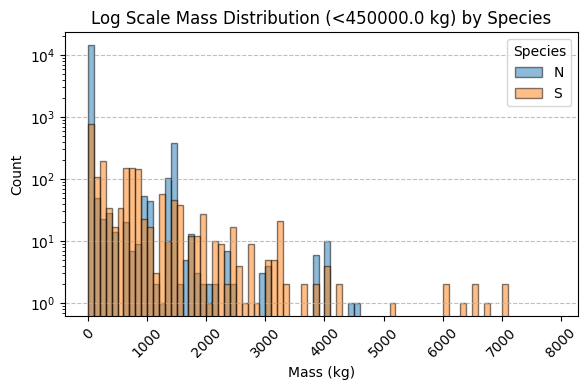

Length of data for N: 15180
Length of data for S: 1958


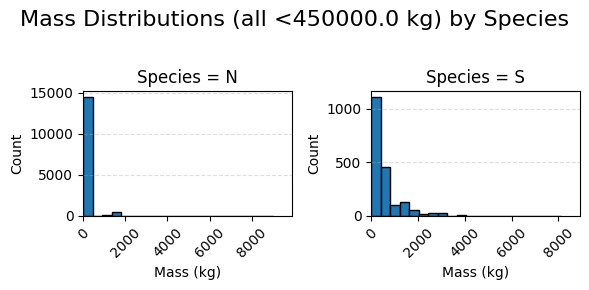

In [12]:
all_species = assigned_df['species_class'].dropna().unique()
bins = np.arange(0, 8000, 100)
plt.figure(figsize=(6,4))

for species in all_species:
    mask = (assigned_df['mass'] < max_mass) & (assigned_df['species_class'] == species)
    subset = assigned_df.loc[mask, 'mass'].dropna()
    # overlay each species, with a bit of transparency
    plt.hist(subset, bins=bins, alpha=0.5, label=species, edgecolor='black')

plt.title(f"Log Scale Mass Distribution (<{max_mass} kg) by Species")
plt.xlabel("Mass (kg)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Species")
plt.yscale('log')

plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()


n = len(all_species)
ncols = 2
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(6, 3*nrows), sharex=False, sharey=False)
axes = axes.flatten()

for ax, sp in zip(axes, all_species):
    data = assigned_df.loc[
        (assigned_df['species_class']==sp) & 
        (assigned_df['mass'] < max_mass),
        'mass'
    ].dropna()
    
    max_data_mass = data.max() if not data.empty else 0
    print(f"Length of data for {sp}: {len(data)}")

    bins_sp = np.arange(0, max_data_mass + 30, max_data_mass / 20)
    ax.hist(data, bins=bins_sp, edgecolor='black')
    
    if sp != "B":
        ax.set_title(f"Species = {sp}")
    else:
        ax.set_title(f"Species = {sp} (One large outlier removed)")

    if max_data_mass > 1:
        ax.set_xlim(0, max_data_mass+(max_data_mass*0.1))  # Add 10% margin to the max mass
    else:
        ax.set_xlim(0, 1)
    
    ax.set_xlabel("Mass (kg)")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    
    # if sp == "Sns":
    #     print(f"All data for {sp}:\n{data.describe()}")
    #     print(list(data))

fig.suptitle(f"Mass Distributions (all <{max_mass} kg) by Species", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


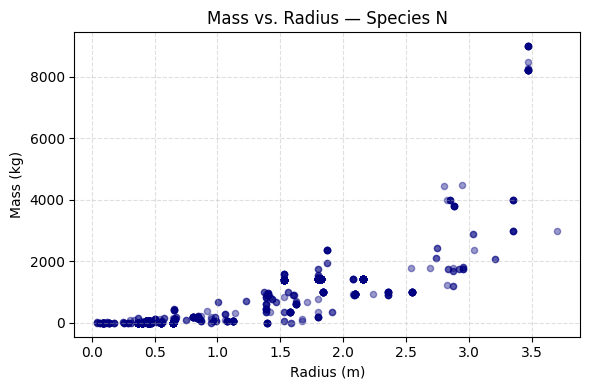

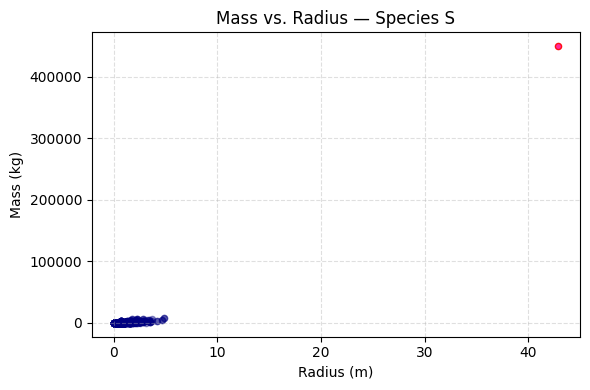

In [13]:
mass_radius_df = assigned_df[['species_class','mass','radius_m']].dropna()
mass_radius_df['radius'] = assigned_df['radius_m']

for sp, group in mass_radius_df.groupby('species_class'):
    plt.figure(figsize=(6,4))

    
    if remove_outliers:
        big_mass_points = group['mass'] > big_mass
    
    # Plot normal points
    plt.scatter(
        group.loc[~big_mass_points, 'radius'],
        group.loc[~big_mass_points, 'mass'],
        s=20, alpha=0.4, color = 'navy', label='not outlier'
    )

    plt.scatter(
        group.loc[big_mass_points, 'radius'],
        group.loc[big_mass_points, 'mass'],
        s=20, alpha=0.9, color='deeppink', edgecolor='red', label='outlier'
    )
    
    plt.title(f"Mass vs. Radius — Species {sp}")
    plt.xlabel("Radius (m)")
    plt.ylabel("Mass (kg)")
    plt.grid(True, linestyle='--', alpha=0.4)
    
    plt.tight_layout()
    plt.show()

In [14]:
# # how many SnS have small radius?
# print(f"Number of SnS with radius < 0.05 m: {len(mass_radius_df[(mass_radius_df['species_class']=='Sns') & (mass_radius_df['radius'] < 0.05)])}")

# # print out the radii values
# print("Radii of SnS with radius < 0.05 m:")
# print(mass_radius_df[(mass_radius_df['species_class']=='Sns') & (mass_radius_df['radius'] < 0.05)]['radius'].values)

### New Statistical Analysis

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids

NOTE: K medoids take much longer to compute. Select the following boolean as needed!

In [16]:
# Set to True to include KMedoids clustering
include_medoids = True  

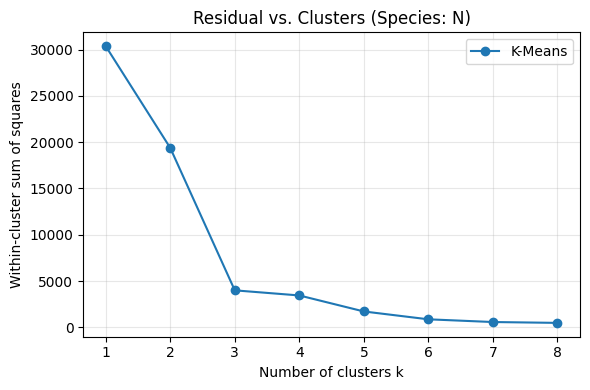

We removed the following S outliers:
          radius      mass
11575  42.827898  450000.0


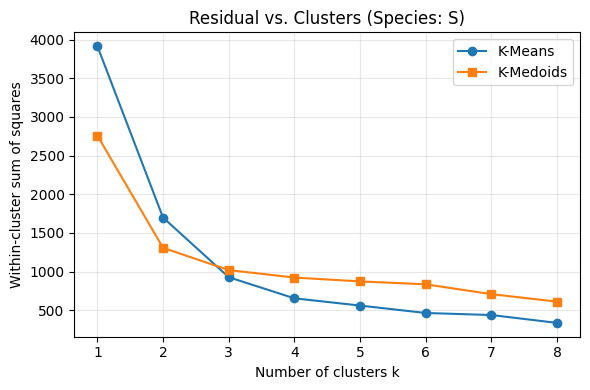

In [17]:
species_groups = mass_radius_df.groupby('species_class')
Xs_by_species = {}
cleaned_groups = {}

for sp, group in species_groups:
    
    # clean up outlier
    if sp == "S":
        S_outliers = group[group['mass'] >= big_mass]
        print("We removed the following S outliers:")
        print(S_outliers[['radius', 'mass']])
        
        group = group[group['mass'] < big_mass]
    cleaned_groups[sp] = group
        
    df = group[['radius', 'mass']].dropna()
    X = df.values
    Xs_by_species[sp] = StandardScaler().fit_transform(X)
    Xs = Xs_by_species[sp] # for use in the loop below
    
    inertia_kmeans  = []
    resid_kmedians  = []
    
    # Computer WCSS (intertia) for k = 1, ..., 8
    ks = range(1,9)
    for k in ks:
        km = KMeans(n_clusters=k, random_state=0).fit(Xs)
        inertia_kmeans.append(km.inertia_)  
        
        # k-medians
        if include_medoids and sp!="N":
            kmn = KMedoids(n_clusters=k, metric='manhattan', init='k-medoids++', random_state=0).fit(Xs)
            # sum of L1 distances to each cluster’s medoid
            # resid = np.sum(kmn.inertia_)  # sklearn_extra uses ‘inertia_’ as sum of distances
            # resid_kmedians.append(resid)
            resid_kmedians.append(kmn.inertia_)
    
    # plot elbow
    plt.figure(figsize=(6, 4))
    plt.plot(ks, inertia_kmeans, '-o', label='K-Means')
    if include_medoids and sp!="N":
        plt.plot(ks, resid_kmedians, '-s', label='K-Medoids')
    plt.xticks(ks)
    plt.xlabel('Number of clusters k')
    plt.ylabel('Within-cluster sum of squares')
    plt.title(f'Residual vs. Clusters (Species: {sp})')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


From this, I think the following # clusters make most sense:
- N: 3
- S: 3

In [18]:
species_names = list(Xs_by_species.keys())
species_names

['N', 'S']

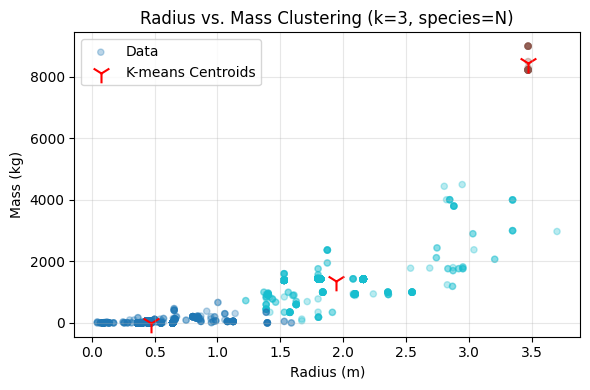

length of data for species N: 15180
K-means centroid coordinates (radius (m), mass (kg)) for species N (k=3):
  Cluster 1: (0.46897, 5.21269)
  Cluster 2: (3.47005, 8466.23125)
  Cluster 3: (1.94383, 1374.39834)


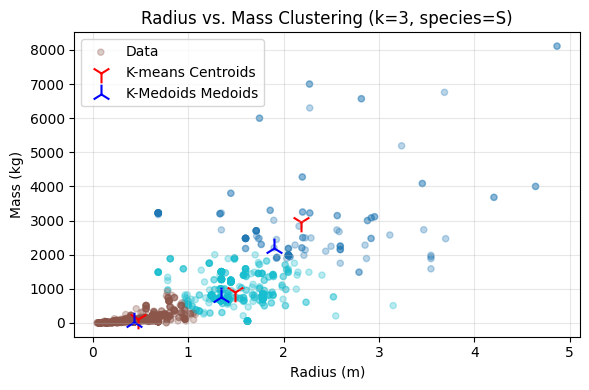

length of data for species S: 1958
K-means centroid coordinates (radius (m), mass (kg)) for species S (k=3):
  Cluster 1: (2.18442, 2955.86338)
  Cluster 2: (0.47955, 105.99298)
  Cluster 3: (1.49665, 894.49237)
K-Medoids centroid coordinates (radius (m), mass (kg)) for species S (k=3):
  Medoid 1: (0.43274, 39.64000)
  Medoid 2: (1.90094, 2200.20000)
  Medoid 3: (1.34219, 750.25000)


In [19]:
# Cluster fit on K-means
species_names = list(Xs_by_species.keys())
k_list = [3, 3]

for i, sp in enumerate(species_names):
    X = Xs_by_species[sp]
    k = k_list[i]
    group = cleaned_groups[sp]
    
    km = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = km.labels_
    
    # unscale centers before plotting!
    scaler = StandardScaler().fit(group[['radius', 'mass']].dropna().values)
    centers_scaled = km.cluster_centers_
    centers_unscaled = scaler.inverse_transform(centers_scaled)
    
    if include_medoids and sp != "N":
        kmn = KMedoids(n_clusters=k, metric='manhattan', init='k-medoids++', random_state=0).fit(X)
        labels_medoids = kmn.labels_
        medoids = kmn.cluster_centers_
        medoids_unscaled = scaler.inverse_transform(medoids)

    
    df = group[['radius', 'mass']].dropna()
    
    plt.figure(figsize=(6, 4))
    plt.scatter(df['radius'], df['mass'], c=labels, cmap='tab10', s=20, alpha=0.3, label='Data')
    plt.scatter(centers_unscaled[:, 0], centers_unscaled[:, 1],
                marker='1', c='red', s=200, label='K-means Centroids')
    if include_medoids and sp != "N":
        plt.scatter(medoids_unscaled[:, 0], medoids_unscaled[:, 1],
                marker='2', c='blue', s=200, label='K-Medoids Medoids' if include_medoids else None)
    plt.xlabel('Radius (m)')
    plt.ylabel('Mass (kg)')
    plt.title(f'Radius vs. Mass Clustering (k={k}, species={sp})')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"length of data for species {sp}: {len(df)}")
    
    print(f"K-means centroid coordinates (radius (m), mass (kg)) for species {sp} (k={k}):")
    for j, center in enumerate(centers_unscaled):
        print(f"  Cluster {j+1}: ({center[0]:.5f}, {center[1]:.5f})")
     
    if include_medoids and sp != "N":
        print(f"K-Medoids centroid coordinates (radius (m), mass (kg)) for species {sp} (k={k}):")
        for j, medoid in enumerate(medoids_unscaled):
            print(f"  Medoid {j+1}: ({medoid[0]:.5f}, {medoid[1]:.5f})")
    

You should follow K-Means for determining the optimal number of clusters for Species S.
Here's the reasoning:

 - Lower WCSS for k >= 2: Although K-Medoids starts with a lower Within-cluster sum of squares (WCSS) at k=1, for any number of clusters from k=2 onwards, the K-Means algorithm (blue line) consistently achieves a lower WCSS than K-Medoids (orange line). A lower WCSS indicates a better clustering result (tighter clusters).
 - Clearer "Elbow" for K-Means: Both algorithms still show a strong "elbow" at k=3, indicating that 3 clusters is likely the optimal choice where the benefit of adding more clusters diminishes significantly. The K-Means elbow is still very pronounced, making it a reliable indicator.
